In [65]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt

data = arff.loadarff('ionosphere.arff')
df_iono = pd.DataFrame(data[0])

data = arff.loadarff('diabetes.arff')
df_diabe = pd.DataFrame(data[0])

data = arff.loadarff('iris.arff')
df_iris = pd.DataFrame(data[0])

data = arff.loadarff('cpu.arff')
df_cpu = pd.DataFrame(data[0])

df_wine = pd.read_csv('winequality-red.csv', sep=";")

In [24]:
df_iris.head()

sepallength  sepalwidth  petallength  petalwidth           class
0          5.1         3.5          1.4         0.2  b'Iris-setosa'
1          4.9         3.0          1.4         0.2  b'Iris-setosa'
2          4.7         3.2          1.3         0.2  b'Iris-setosa'
3          4.6         3.1          1.5         0.2  b'Iris-setosa'
4          5.0         3.6          1.4         0.2  b'Iris-setosa'

<AxesSubplot: title={'center': 'petallength'}, xlabel='class'>

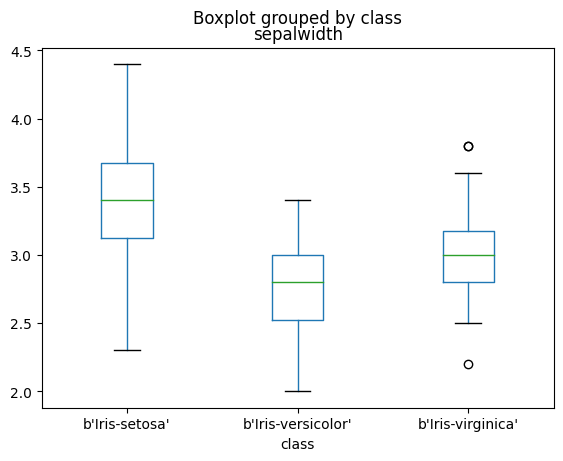

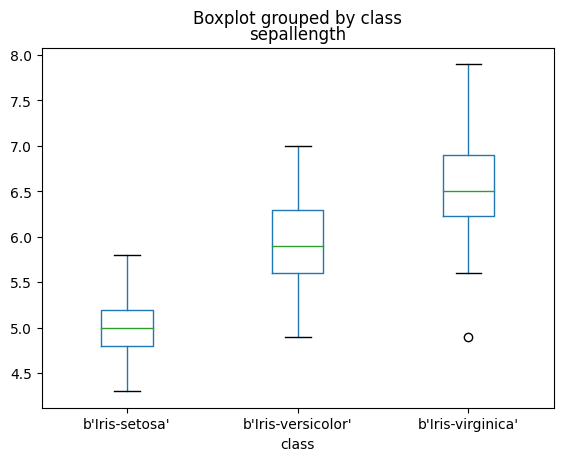

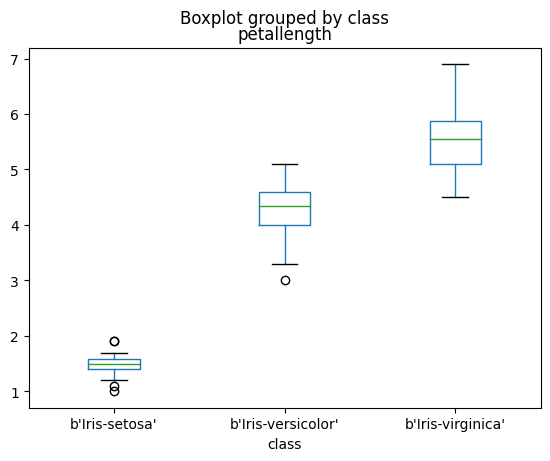

In [17]:
df_iris.boxplot(by='class', column=['sepalwidth'], grid=False)

df_iris.boxplot(by='class', column=['sepallength'], grid=False)

df_iris.boxplot(by='class', column=['petallength'], grid=False)

In [25]:
from sklearn import preprocessing

def standardize(df: pd.DataFrame):
    res = df.copy()
    scaler = preprocessing.StandardScaler()

    num_df = df.select_dtypes(exclude=['object', 'category'])
    res[num_df.columns] = scaler.fit_transform(num_df)
    return res

def normalize(df: pd.DataFrame):
    res = df.copy()
    scaler = preprocessing.MinMaxScaler()

    num_df = df.select_dtypes(exclude=['object', 'category'])
    res[num_df.columns] = scaler.fit_transform(num_df)
    return res

<AxesSubplot: title={'center': 'petallength'}, xlabel='class'>

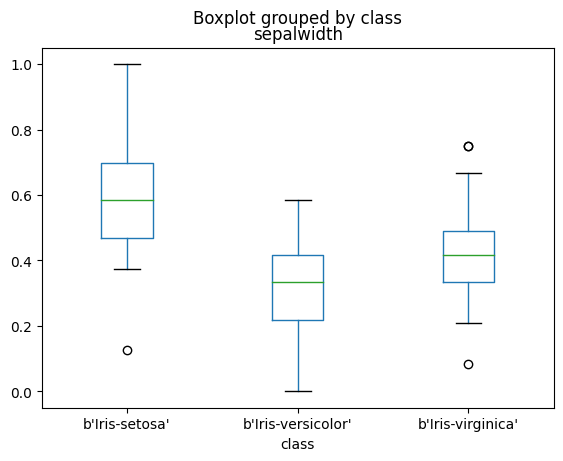

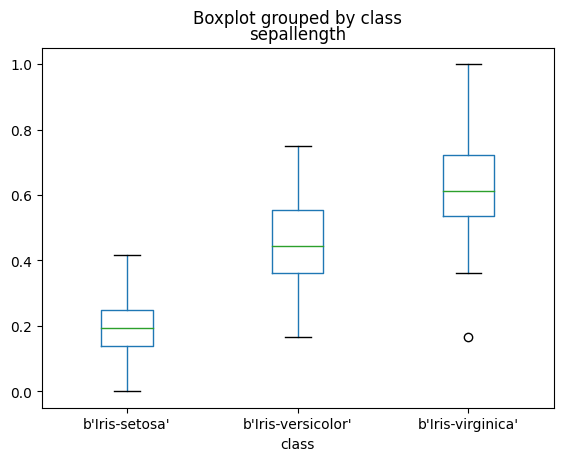

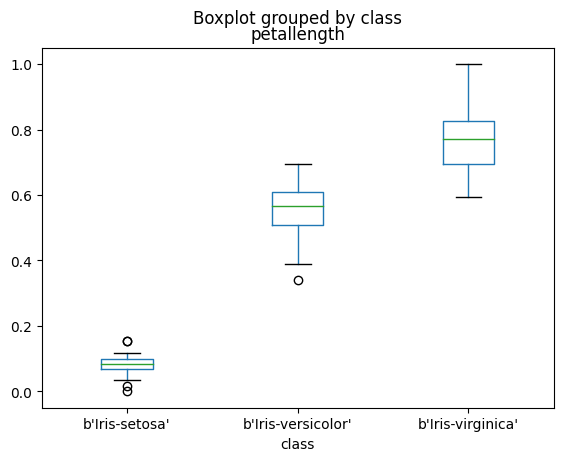

In [26]:
df_iris = standardize(df_iris)
df_iris = normalize(df_iris)

df_iris.head()

df_iris.boxplot(by='class', column=['sepalwidth'], grid=False)

df_iris.boxplot(by='class', column=['sepallength'], grid=False)

df_iris.boxplot(by='class', column=['petallength'], grid=False)

<AxesSubplot: title={'center': 'sepalwidth'}, xlabel='sepallength'>

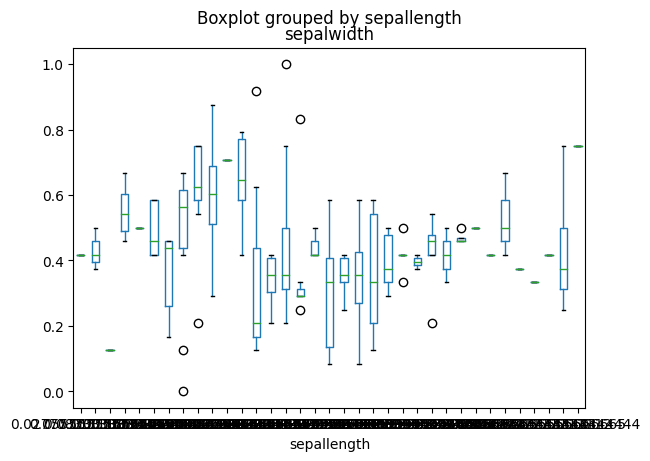

In [36]:
df_iris = standardize(df_iris)
df_iris = normalize(df_iris)

df_iris.boxplot(by='sepallength', column=['sepalwidth'], grid=False)

In [48]:
df_diabe.head()

preg   plas  pres  skin   insu  mass   pedi   age               class
0   6.0  148.0  72.0  35.0    0.0  33.6  0.627  50.0  b'tested_positive'
1   1.0   85.0  66.0  29.0    0.0  26.6  0.351  31.0  b'tested_negative'
2   8.0  183.0  64.0   0.0    0.0  23.3  0.672  32.0  b'tested_positive'
3   1.0   89.0  66.0  23.0   94.0  28.1  0.167  21.0  b'tested_negative'
4   0.0  137.0  40.0  35.0  168.0  43.1  2.288  33.0  b'tested_positive'

<AxesSubplot: title={'center': 'insu'}, xlabel='class'>

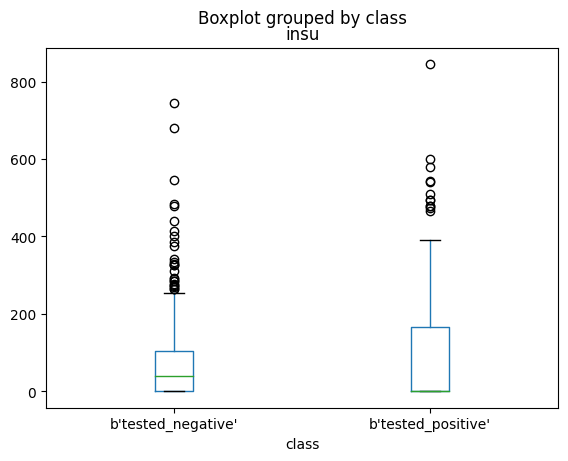

In [57]:
#df_diabe = standardize(df_diabe)
#df_diabe = normalize(df_diabe)

df_diabe.boxplot(by='class', column=['insu'], grid=False)

<AxesSubplot: title={'center': 'petallength'}, xlabel='petalwidth'>

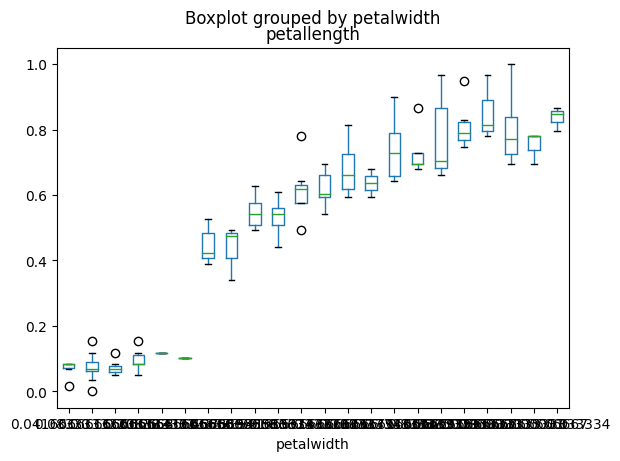

In [58]:
df_iris = standardize(df_iris)
df_iris = normalize(df_iris)

df_iris.head()

df_iris.boxplot(by='petalwidth', column=['petallength'], grid=False)

In [59]:
df_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [62]:
df_wine = standardize(df_wine)
df_wine = normalize(df_wine)

<AxesSubplot: title={'center': 'pH'}, xlabel='quality'>

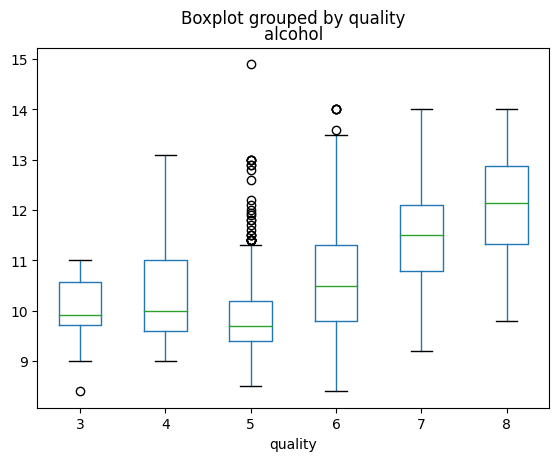

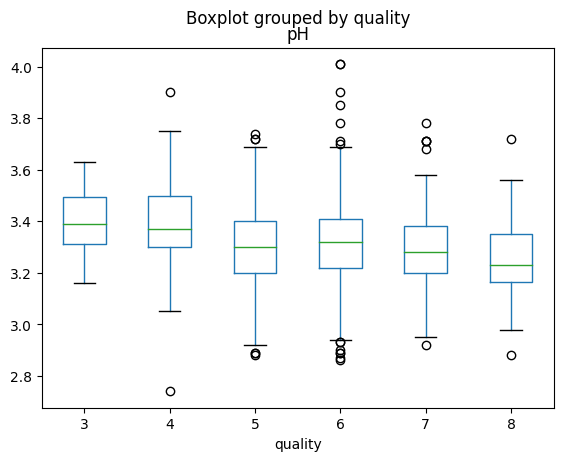

In [71]:
df_wine.boxplot(by='quality', column=['alcohol'], grid=False)
df_wine.boxplot(by='quality', column=['pH'], grid=False)

In [73]:
import plotly.express as px

df = df_iris
fig = px.scatter_matrix(df,
    dimensions=["sepalwidth", "sepallength", "petalwidth", "petallength"],
    color="class")
fig.show()

/home/ricardo/PycharmProjects/Local_IMD/venv/lib/python3.9/site-packages/plotly/express/_core.py:279: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  dims = [


In [75]:
df_diabe.head()

preg   plas  pres  skin   insu  mass   pedi   age               class
0   6.0  148.0  72.0  35.0    0.0  33.6  0.627  50.0  b'tested_positive'
1   1.0   85.0  66.0  29.0    0.0  26.6  0.351  31.0  b'tested_negative'
2   8.0  183.0  64.0   0.0    0.0  23.3  0.672  32.0  b'tested_positive'
3   1.0   89.0  66.0  23.0   94.0  28.1  0.167  21.0  b'tested_negative'
4   0.0  137.0  40.0  35.0  168.0  43.1  2.288  33.0  b'tested_positive'

In [81]:
df = df_diabe
fig = px.scatter_matrix(df,
    dimensions=["insu", "mass", "age"],
    color="class")
fig.show()

/home/ricardo/PycharmProjects/Local_IMD/venv/lib/python3.9/site-packages/plotly/express/_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [82]:
df_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [89]:
df = df_wine
fig = px.scatter_matrix(df,
    dimensions=["alcohol", "pH", "citric acid"],
    color="quality")
fig.show()

/home/ricardo/PycharmProjects/Local_IMD/venv/lib/python3.9/site-packages/plotly/express/_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



/tmp/ipykernel_8322/2181367290.py:13: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



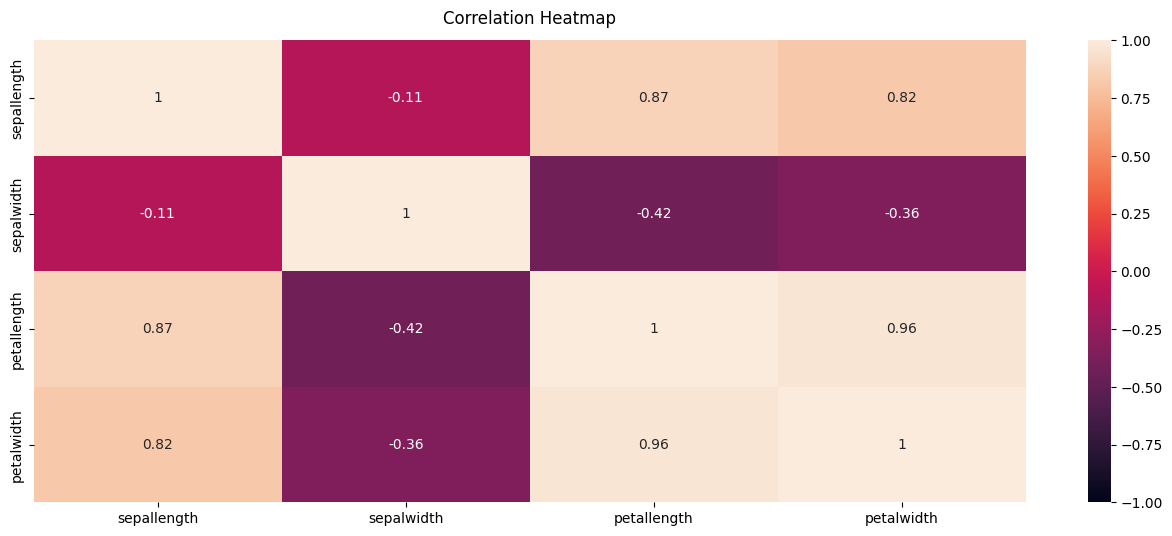

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dataframe = df_iris

# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(dataframe.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
#
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

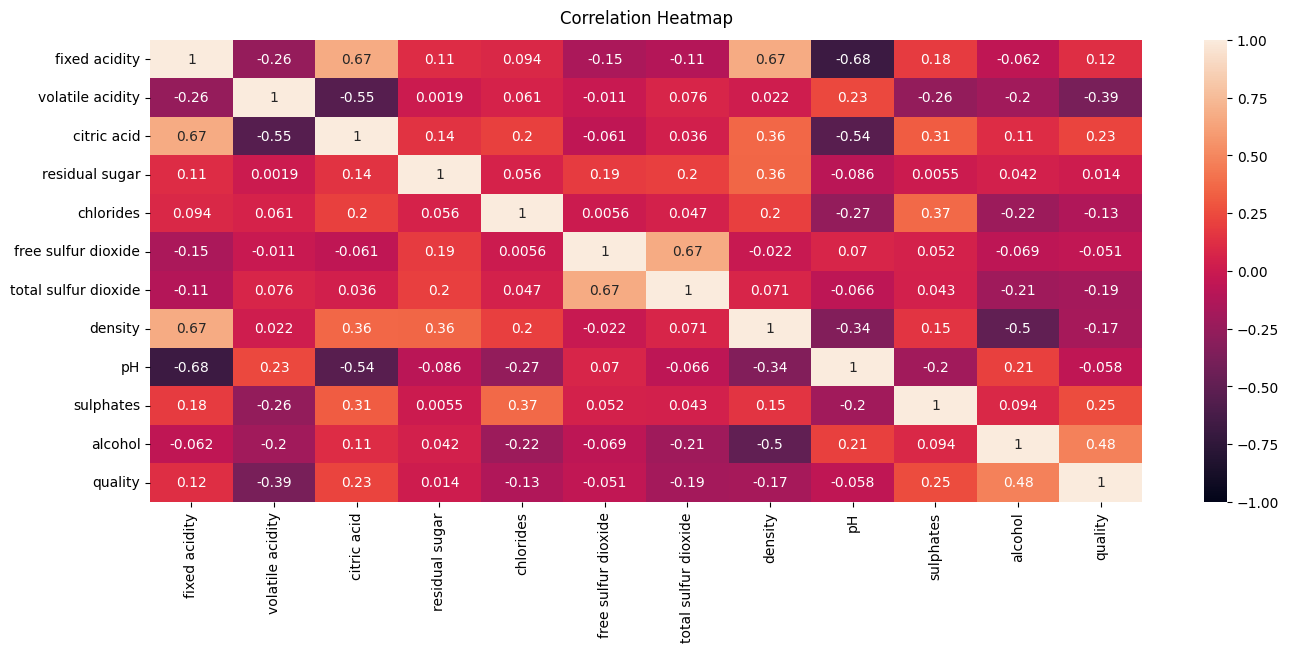

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dataframe = df_wine

# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(dataframe.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
#
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

   preg   plas  pres  skin   insu  mass   pedi   age               class
0   6.0  148.0  72.0  35.0    0.0  33.6  0.627  50.0  b'tested_positive'
1   1.0   85.0  66.0  29.0    0.0  26.6  0.351  31.0  b'tested_negative'
2   8.0  183.0  64.0   0.0    0.0  23.3  0.672  32.0  b'tested_positive'
3   1.0   89.0  66.0  23.0   94.0  28.1  0.167  21.0  b'tested_negative'
4   0.0  137.0  40.0  35.0  168.0  43.1  2.288  33.0  b'tested_positive'


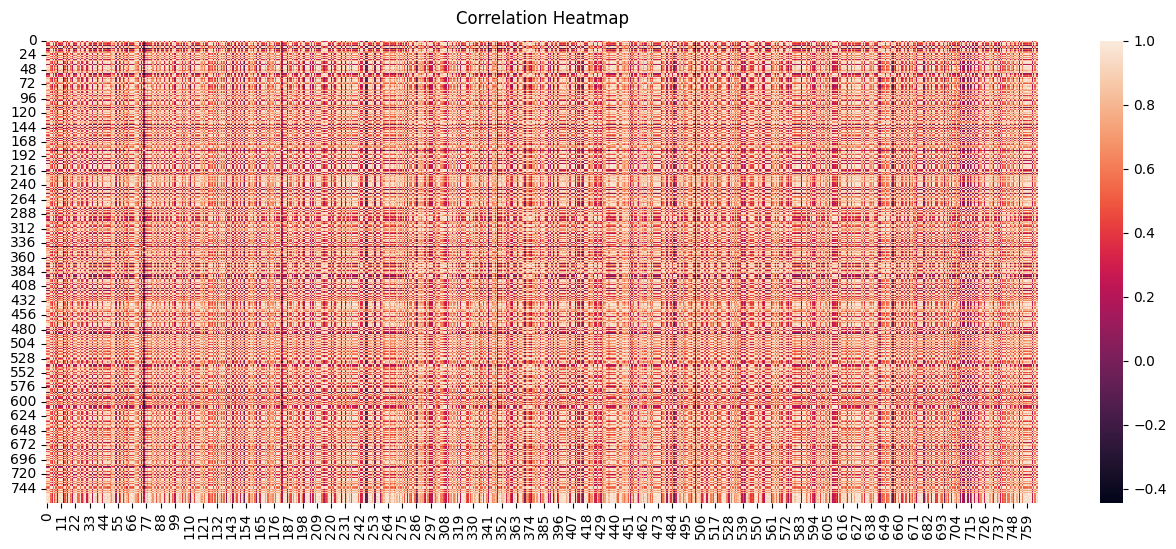

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dataframe = df_diabe

print(dataframe.head())

# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(dataframe.T.drop('class').astype('float').corr())
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
#
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

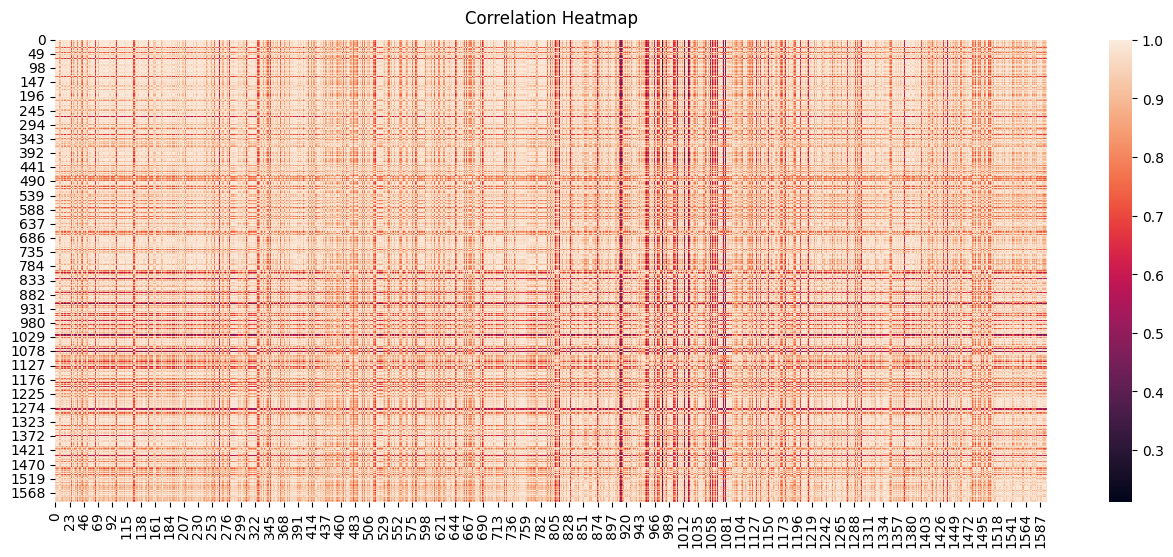

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dataframe = df_wine

print(dataframe.head())

# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(dataframe.T.drop('quality').astype('float').corr())
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
#
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);